# Classification du genre de musique avec différents modèles de Machine Learning

**Auteur :** DAUVERGNE Florian 

Ce projet a pour objectif de classer des morceaux de musique selon leur genre en utilisant différents algorithmes de machine learning. 


Nous allons utiliser deux algorithmes de machine learning afin de comparer leurs performances et déterminer lequel est le plus adapté à ce type de tâche : 
- **Support Vector Classification (SVC)**
- **K-Nearest Neighbors (KNN)**

## Objectifs du Projet

- **Explorer les données musicales** : Préparation des données, extraction des caractéristiques pertinentes des morceaux (tempo, tonalité, etc.).
- **Tester plusieurs modèles de classification** : Comparer différents algorithmes de machine learning pour déterminer celui qui offre les meilleures performances.
- **Évaluer les résultats** : Utiliser des métriques telles que la précision, le rappel et la matrice de confusion pour évaluer la qualité de la classification.

In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve,ConfusionMatrixDisplay,roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.svm import SVC


### 1. Chargement des Données

Nous commençons par charger le jeu de données compartant les informations sur les morceaux ainsi que leurs genres respectifs.

In [4]:
# Charger les données
dataset = pd.read_csv('./dataset/musicGenre.csv')

Nous analysons ensuite les caractèristiques de ce jeu de données

In [5]:
# Afficher les dimensions du jeu de données
dataset.shape

(17996, 17)

In [6]:
# Afficher les 5 premières lignes du jeu de données
dataset.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [7]:
# Afficher les statistiques descriptives
dataset.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Affichons la répartition des classes

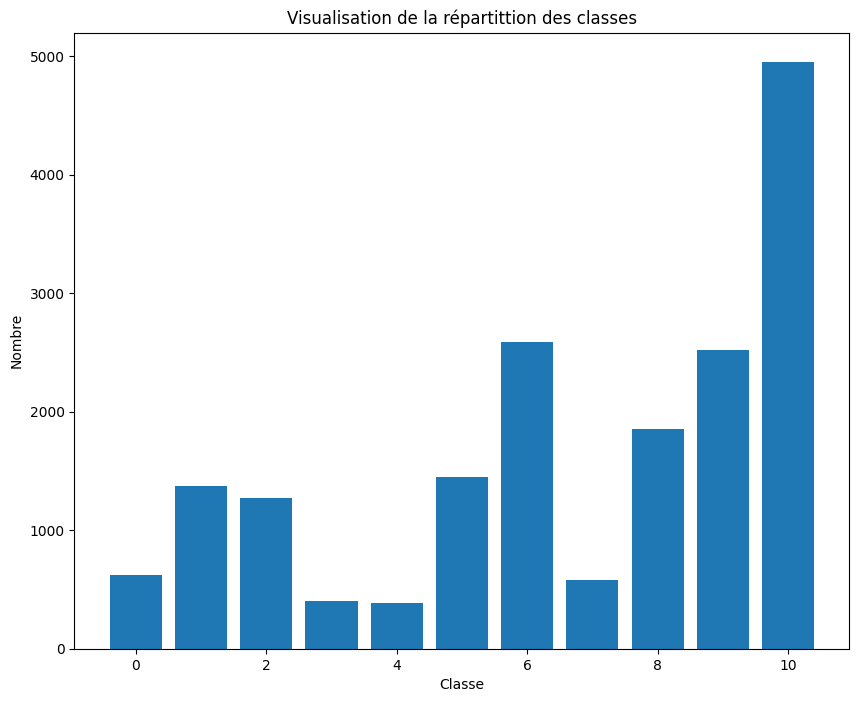

In [8]:
# Compter les occurrences de chaque classe
class_counts = dataset['Class'].value_counts()
class_names = class_counts.index

# Visualisation de la répartition des classes
plt.figure(figsize=(10, 8))
plt.bar(class_names,class_counts , label="Classe Prédite")
plt.xlabel("Classe")
plt.ylabel("Nombre")
plt.title("Visualisation de la répartittion des classes")
plt.show()

Sur le graphique, nous pouvons observer une disparité dans la répartition des données sur ce graphique. 

Certaines classes sont nettement plus représentées que d'autres (Classe 10) et d'autres sont nettement moins représenté (Classe 0, 3 et 4). 

Nous allons d'abord réaliser notre étude sur ce dataset, puis la reproduire sur un dataset équilibré pour observer une hausse ou une baisse des performances

### 2. Préparation des Données
Avant de pouvoir appliquer les modèles de machine learning, nous devons préparer les données. Cela inclut :

- Nettoyage des données (gestion des valeurs manquantes).
- Extraction des caractéristiques audio (tempo, etc.).
- Encodage des labels (genres) en variables numériques.

In [7]:
# Compter les valeurs manquantes
dataset.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
# Suppression des colonnes non pertinentes pour la classification
data_filtered = dataset.drop(columns=['Artist Name', 'Track Name'])

# Remplacement des valeurs manquantes par la moyenne pour les colonnes numériques
data_filtered = data_filtered.fillna(data_filtered.mean())

# Séparation des caractéristiques (X) et des labels (y)
X = data_filtered.drop('Class', axis=1)
y = data_filtered['Class']

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Vérification des formes des ensembles d'entraînement et de test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14396, 14), (3600, 14), (14396,), (3600,))

Maintenant que nous possèdons des données d'entrainement et de test nous pouvons créer nos modèles

### 3. Préparation des modèles

Nous allons déterminer quels sont les meilleurs hyperparmètres à fournir à nos modèles pour obtenir le meilleur résultat

Commençons par le modèle KNN.

Nous allons comparer la précision du modèles en modifiant le nombre de voisin de 1 jusqu'à 30

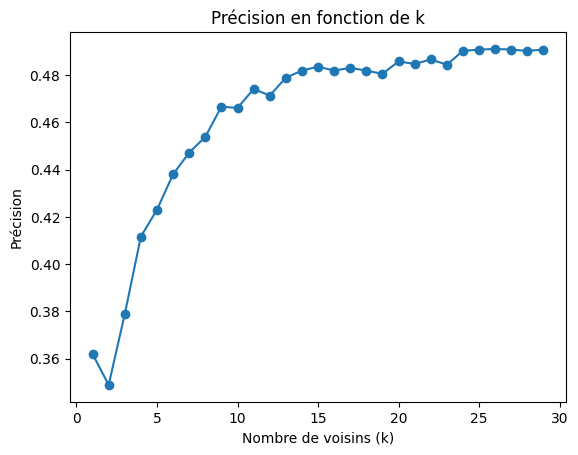

In [9]:
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.title("Précision en fonction de k")
plt.show()

Sur ce graphique, nous pouvons observer que la précision stagne à partir de K = 25.

Nous allons donc utiliser 25 voisins pour notre modèle KNN

In [10]:
# Initialisation et entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Passon au modèle SVC

Nous allons réaliser une technique Grid Search afin d'obtenir les meilleurs hyperparamètres

In [11]:
# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['rbf', 'linear']
}

svc = SVC()

grid_search_svc = GridSearchCV(svc, param_grid, cv=2, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

# Afficher les meilleurs paramètres pour SVC
print("Meilleurs paramètres pour SVC:", grid_search_svc.best_params_)

Meilleurs paramètres pour SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Une fois les meilleurs hyperparamètres découverts nous les utilisons pour créer notre SVC

In [12]:
# Entraîner le modèle SVC avec les meilleurs paramètres
svc = SVC(**grid_search_svc.best_params_)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

# 4. Évaluation des Modèles

Nous utilisons plusieurs métriques pour évaluer la performance des modèles :

- Matrice de confusion
- Courbes ROC
- Rapport de classification

Réalisons des prédicitons sur l'ensemble de nos modèles

In [13]:
# Prédiction sur l'ensemble de test avec KNN
y_pred_knn = knn.predict(X_test)

# Prédiction sur l'ensemble de test avec SVC
y_pred_svc = svc.predict(X_test)

Générons maintenant les matrices de confusion

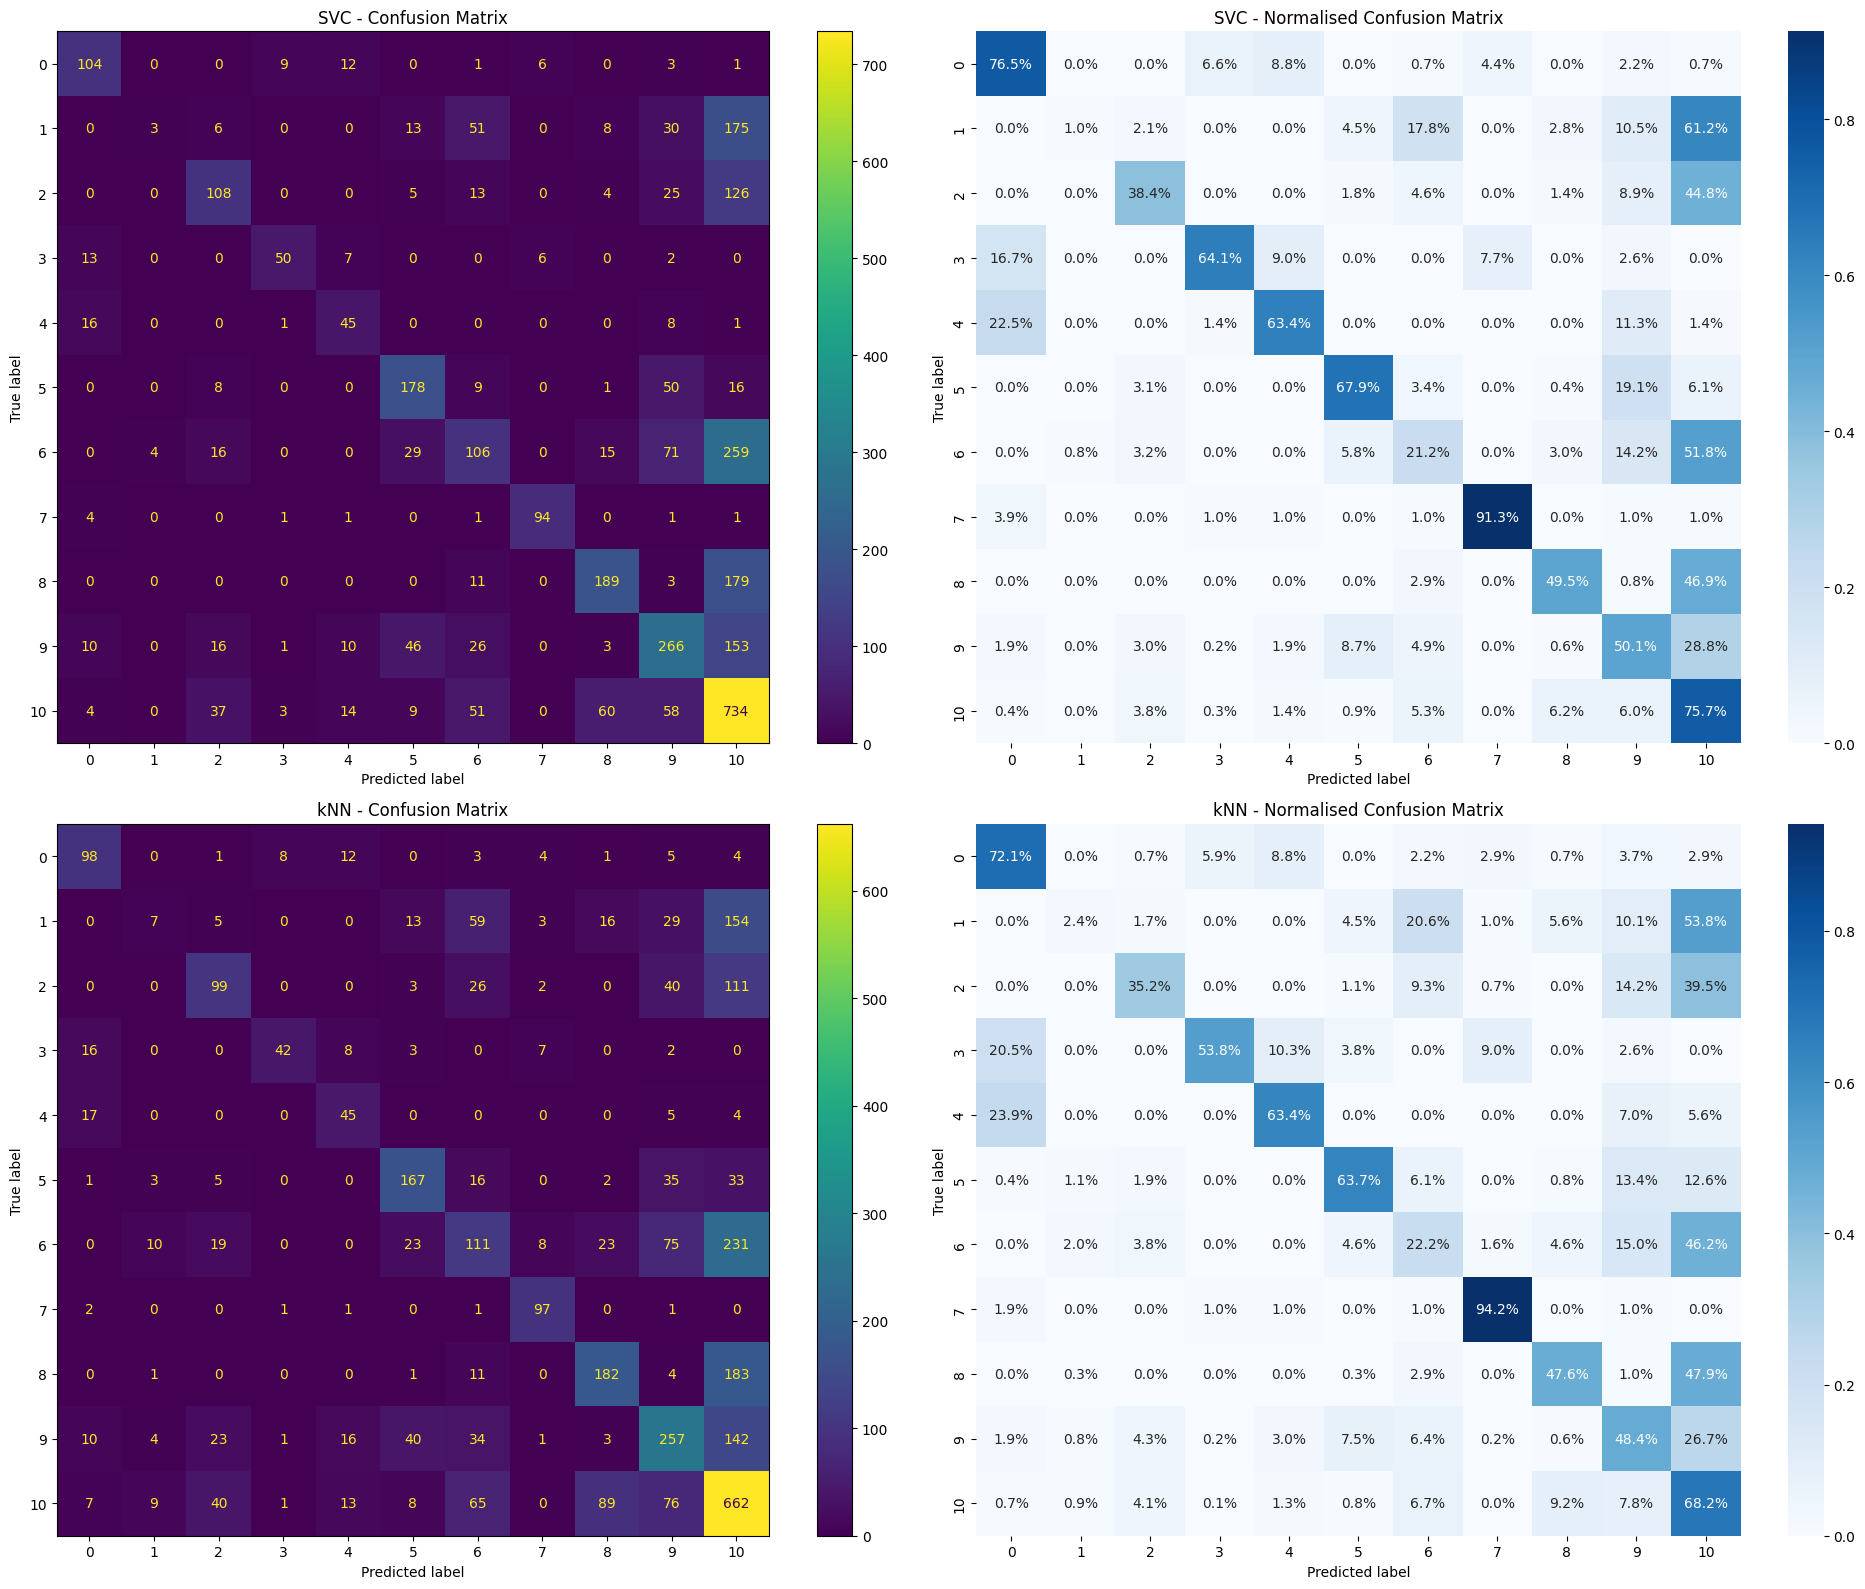

In [14]:
# Calcul des matrices de confusion normalisées pour les deux modèles
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc, normalize='true')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, normalize='true')

# Récupérer les étiquettes uniques triées
labels = np.sort(y_test.unique())

# Création de la figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Configuration des axes pour chaque sous-figure
axe_confusion_matrix_svc = axes[0, 0]
axe_confusion_matrix_normalised_svc = axes[0, 1]
axe_confusion_matrix_knn = axes[1, 0]
axe_confusion_matrix_normalised_knn = axes[1, 1]

# Affichage des matrices de confusion pour le modèle SVC
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, ax=axe_confusion_matrix_svc)
axe_confusion_matrix_svc.set_title("SVC - Confusion Matrix")

# Affichage de la matrice de confusion normalisée pour SVC
sns.heatmap(conf_matrix_svc, annot=True, fmt=".1%", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axe_confusion_matrix_normalised_svc)
axe_confusion_matrix_normalised_svc.set_xlabel("Predicted label")
axe_confusion_matrix_normalised_svc.set_ylabel("True label")
axe_confusion_matrix_normalised_svc.set_title("SVC - Normalised Confusion Matrix")

# Affichage des matrices de confusion pour le modèle kNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axe_confusion_matrix_knn)
axe_confusion_matrix_knn.set_title("kNN - Confusion Matrix")

# Affichage de la matrice de confusion normalisée pour kNN
sns.heatmap(conf_matrix_knn, annot=True, fmt=".1%", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axe_confusion_matrix_normalised_knn)
axe_confusion_matrix_normalised_knn.set_xlabel("Predicted label")
axe_confusion_matrix_normalised_knn.set_ylabel("True label")
axe_confusion_matrix_normalised_knn.set_title("kNN - Normalised Confusion Matrix")

# Ajustement de la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()


#### Modèle SVC :

La classes 10 semble bien classée avec une précision de 75,7 % (matrice normalisée). Cela indique que le modèle SVC est assez performant pour cette classe.

Cepenadant, les classes 1 et 3 montrent une faible précision avec des valeurs respectives de 38,4 % et 22,5 % sur la diagonale de la matrice normalisée.

Ces classes sont souvent confondues avec d’autres, indiquant que le modèle a du mal à distinguer ces classes.

#### Modèle kNN :

Le modèle kNN affiche une précision de 68,2 % pour la Classe 10, ce qui est inférieur par rapport au modèle SVC.

Les Classes 1 et 3 sont également mal classées, avec des taux de précision respectifs de 35,2 % et 23,9 %, ce qui est comparable au modèle SVC.

Comme pour le SVC, certaines classes se chevauchent fréquemment. Par exemple, la Classe 9 est souvent confondue avec d’autres classes dans le modèle kNN.

Réalisons maintenant les courbes ROC et Precision-Recall

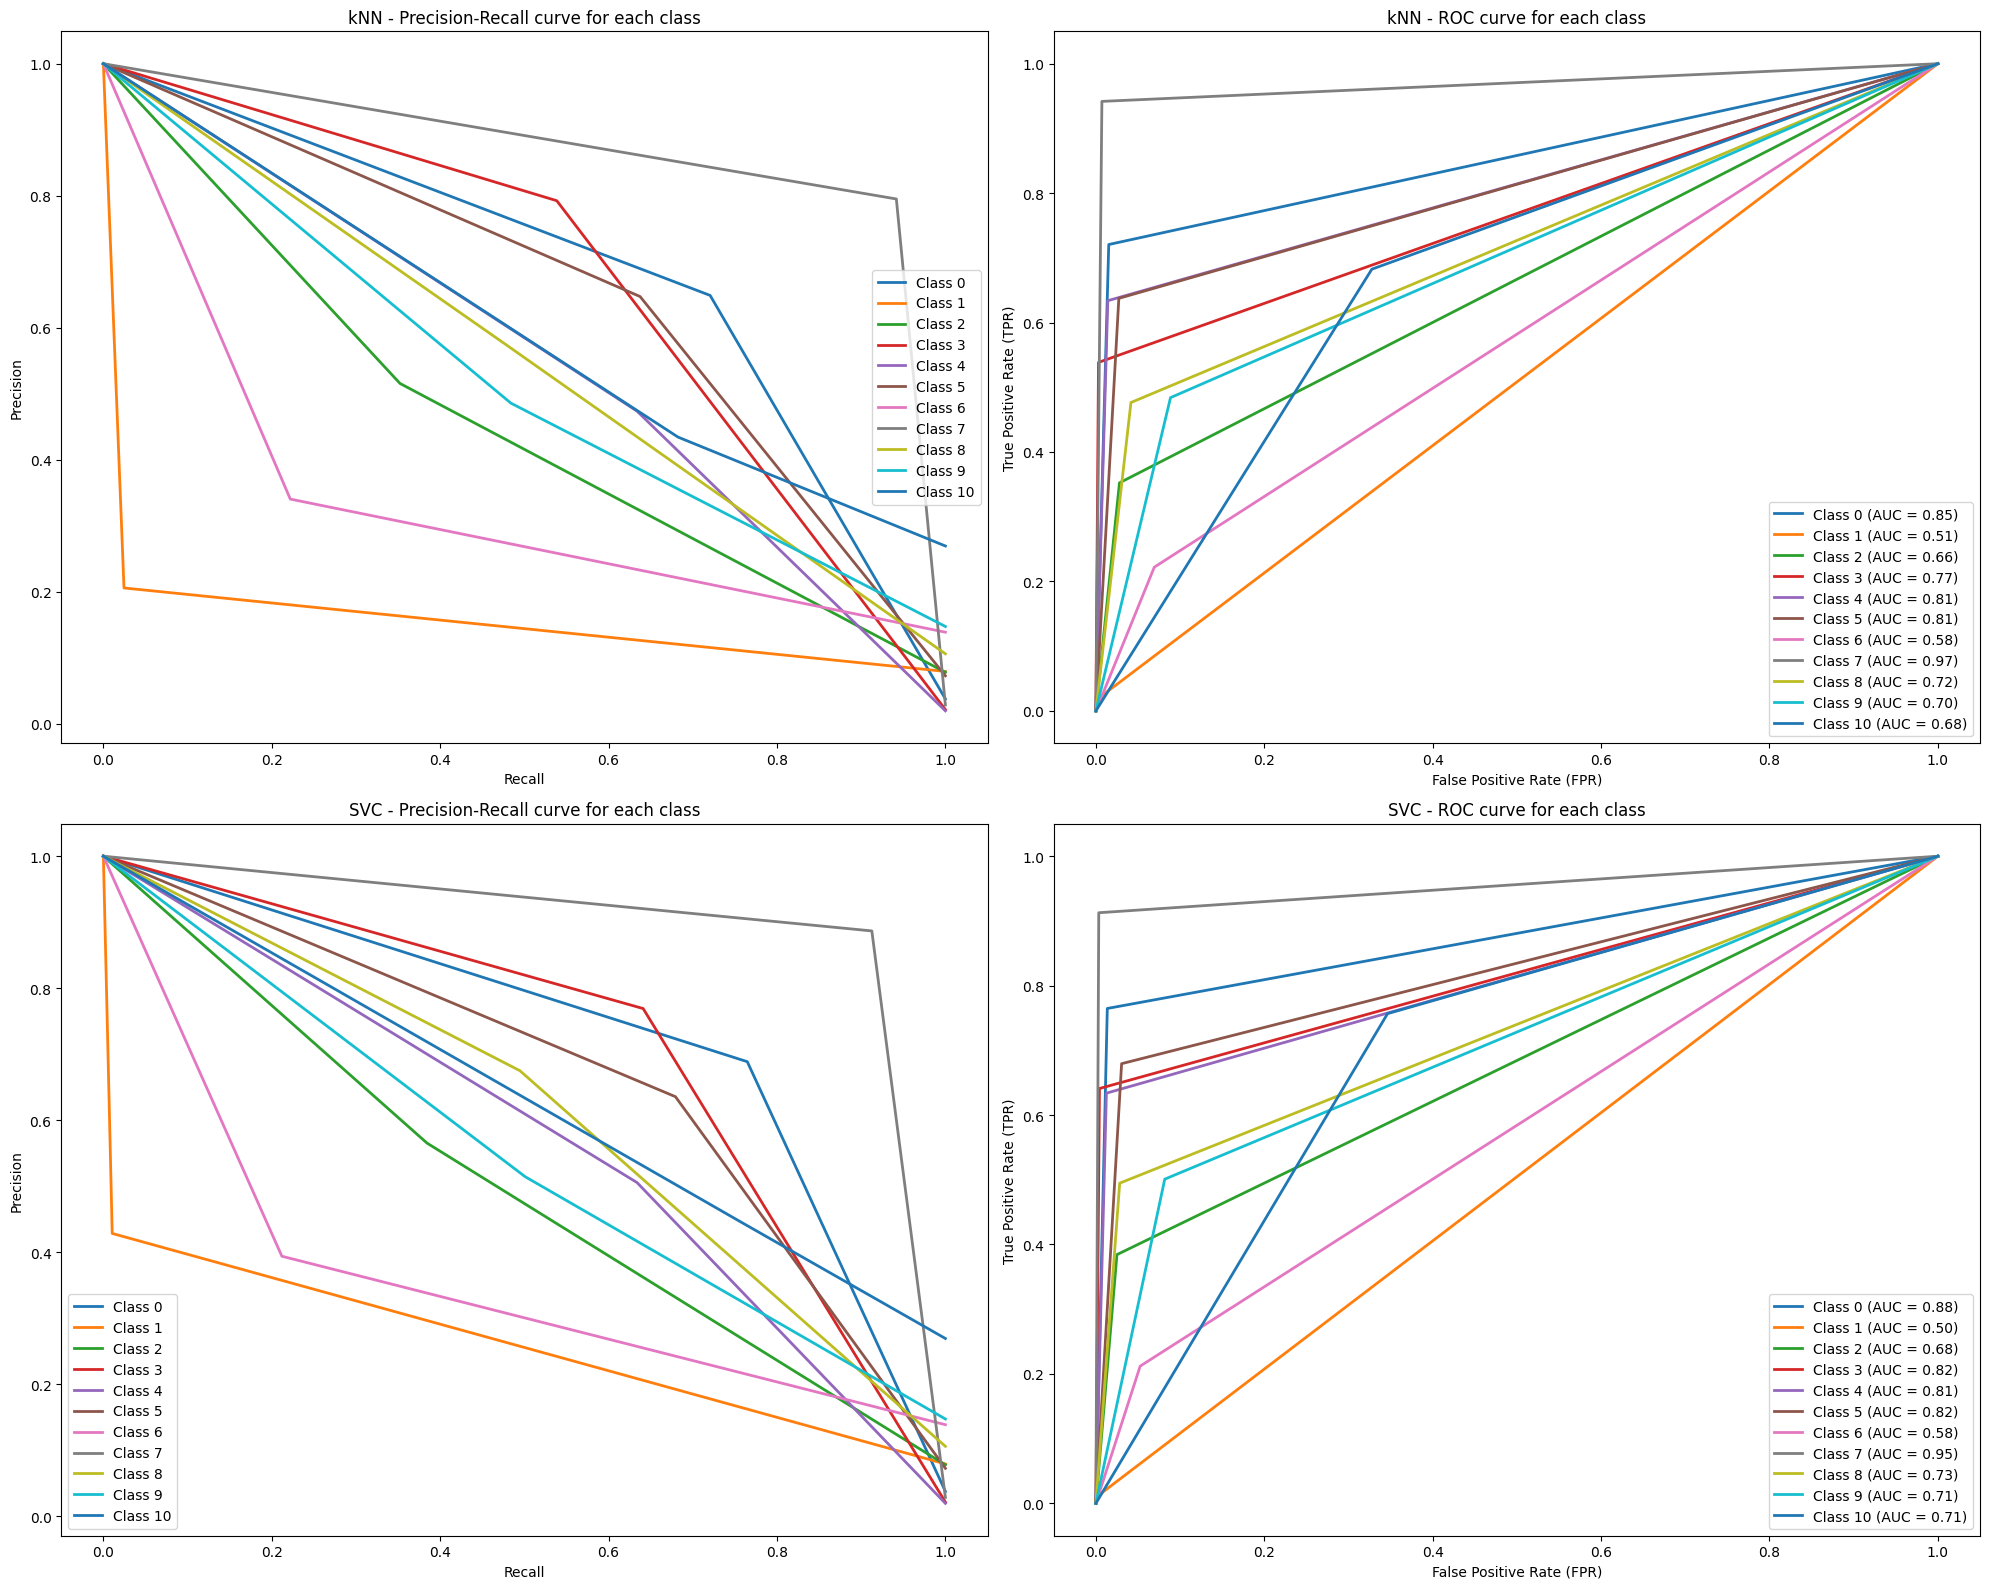

In [15]:

# Binarisation des classes pour les calculs des courbes ROC
y_test_bin_knn = label_binarize(y_test, classes=knn.classes_)
y_test_bin_svc = label_binarize(y_test, classes=svc.classes_)
n_classes_knn = y_test_bin_knn.shape[1]
n_classes_svc = y_test_bin_svc.shape[1]

# Création de la figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Courbes de précision-rappel pour le modèle kNN
for i in range(n_classes_knn):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_knn == i)
    axes[0, 0].plot(recall, precision, lw=2, label=f'Class {knn.classes_[i]}')

axes[0, 0].set_xlabel("Recall")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].set_title("kNN - Precision-Recall curve for each class")
axes[0, 0].legend()

# Courbes ROC pour le modèle kNN
for i in range(n_classes_knn):
    fpr, tpr, _ = roc_curve(y_test_bin_knn[:, i], y_pred_knn == i)
    axes[0, 1].plot(fpr, tpr, lw=2, label=f'Class {knn.classes_[i]} (AUC = {auc(fpr, tpr):.2f})')

axes[0, 1].set_xlabel("False Positive Rate (FPR)")
axes[0, 1].set_ylabel("True Positive Rate (TPR)")
axes[0, 1].set_title("kNN - ROC curve for each class")
axes[0, 1].legend()

# Courbes de précision-rappel pour le modèle SVC
for i in range(n_classes_svc):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_svc == i)
    axes[1, 0].plot(recall, precision, lw=2, label=f'Class {svc.classes_[i]}')

axes[1, 0].set_xlabel("Recall")
axes[1, 0].set_ylabel("Precision")
axes[1, 0].set_title("SVC - Precision-Recall curve for each class")
axes[1, 0].legend()

# Courbes ROC pour le modèle SVC
for i in range(n_classes_svc):
    fpr, tpr, _ = roc_curve(y_test_bin_svc[:, i], y_pred_svc == i)
    axes[1, 1].plot(fpr, tpr, lw=2, label=f'Class {svc.classes_[i]} (AUC = {auc(fpr, tpr):.2f})')

axes[1, 1].set_xlabel("False Positive Rate (FPR)")
axes[1, 1].set_ylabel("True Positive Rate (TPR)")
axes[1, 1].set_title("SVC - ROC curve for each class")
axes[1, 1].legend()

# Ajustement de la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()


## ROC

### Modèle KNN
Certaines classes, comme la Classe 8, atteignent une AUC de 0,97, ce qui est très bon.

D'autres classes, comme la Classe 1 avec une AUC de 0,51, montrent une faible capacité de séparation.

### Modèle SVC
Certaines classes, comme la Classe 0 et la Classe 8, ont également une AUC élevée (respectivement 0,88 et 0,93).

Cependant, certaines classes (comme la Classe 1 avec une AUC de 0,50) montrent des performances faibles, similaires au modèle kNN.

##  Precision-Recall

### Modèle KNN
Plusieurs courbes, comme celles de la Classe 1, Classe 3, et Classe 7, montrent une forte chute de la précision dès que le rappel augmente. 

Cela signifie que le modèle kNN a du mal à classifier correctement ces classes sans compromettre la précision.

La Classe 0 et la Classe 8 montrent des courbes relativement meilleures avec une précision et un rappel plus stables jusqu’à un certain seuil, indiquant une performance acceptable pour ces classes.

Les courbes pour la Classe 1 et Classe 3 chutent de manière significative, ce qui signifie que kNN a du mal à maintenir une bonne précision en même temps qu'un bon rappel pour ces classes.

### Modèle SVC
Les courbes Precision-Recall pour certaines classes comme la Classe 0 et Classe 8 sont légèrement meilleures dans le modèle SVM que dans kNN, ce qui indique que SVM est plus efficace pour classer ces classes avec un bon équilibre entre précision et rappel.

Similaire à kNN, certaines classes (notamment Classe 1 et Classe 3) montrent également une baisse rapide de la précision dès que le rappel augmente. 

Cela signifie que même le modèle SVM a du mal à gérer ces classes de manière fiable


In [16]:
# Évaluation de la performance du SVC
svc_class_report = classification_report(y_test, y_pred_svc)
print(svc_class_report)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       136
           1       0.43      0.01      0.02       286
           2       0.57      0.38      0.46       281
           3       0.77      0.64      0.70        78
           4       0.51      0.63      0.56        71
           5       0.64      0.68      0.66       262
           6       0.39      0.21      0.28       500
           7       0.89      0.91      0.90       103
           8       0.68      0.49      0.57       382
           9       0.51      0.50      0.51       531
          10       0.45      0.76      0.56       970

    accuracy                           0.52      3600
   macro avg       0.59      0.54      0.54      3600
weighted avg       0.52      0.52      0.49      3600



In [17]:
# Évaluation de la performance de KNN
knn_class_report = classification_report(y_test, y_pred_knn)
print(knn_class_report)

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       136
           1       0.21      0.02      0.04       286
           2       0.52      0.35      0.42       281
           3       0.79      0.54      0.64        78
           4       0.47      0.63      0.54        71
           5       0.65      0.64      0.64       262
           6       0.34      0.22      0.27       500
           7       0.80      0.94      0.86       103
           8       0.58      0.48      0.52       382
           9       0.49      0.48      0.48       531
          10       0.43      0.68      0.53       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.47      3600



##  Rapport de classification

### Modèle KNN
Le modèles KNN possède une accuracy moyenne de 0.49 avec des problème de prècison au niveau des classes 6 et 1

### Modèle SVC
Le modèles KNN possède une accuracy moyenne de 0.52 avec des problème de prècison uniquement sur la classe 1

## Résumé

Nos résultats (courbes Precision-Recall et matrices de confusion) confirment que la disparité des données impacte négativement les performances de nos modèles, limitant leur capacité à classifier de manière équilibrée toutes les classes.

Cependant, nous pouvons déjà observer une meilleur performance avec le modèle SVC

# 5. Rééquilibrage des données

Nous allons réaliser un oversampling en utilisant SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)


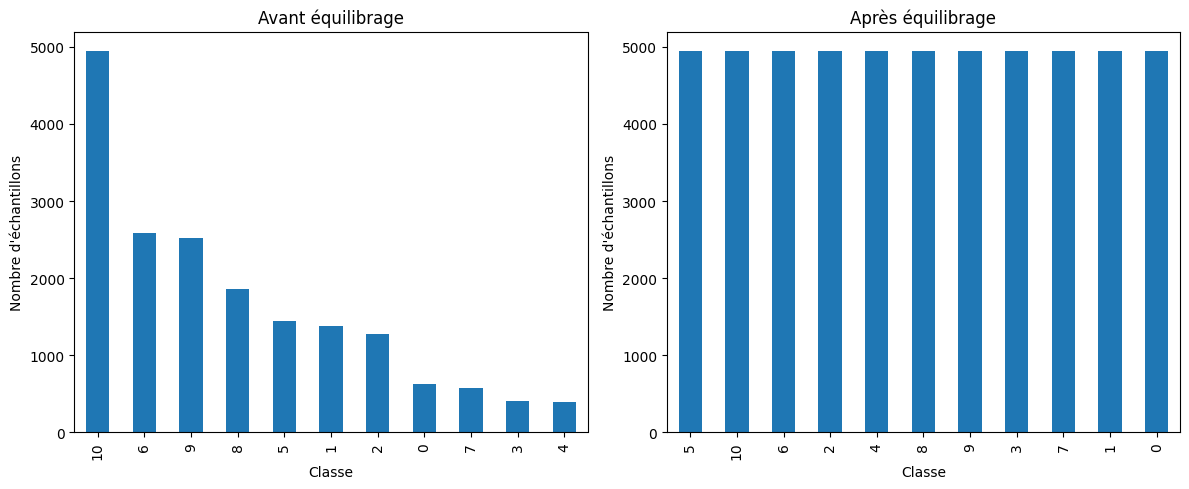

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Distribution des classes avant l'équilibrage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pd.Series(y).value_counts().plot(kind='bar', title='Avant équilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')

# Distribution des classes après l'équilibrage
plt.subplot(1, 2, 2)
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Après équilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')

plt.tight_layout()
plt.show()


Une fois l'équilabrage réalisé nous pouvons refaire notre étude avec ces nouvelles données

Commençons en recréant nos modèles

In [20]:
# Recréation des données de test et d'entrainement avec les données équilibrées
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Recréation des modèles avec les meilleurs paramètres
svc = SVC(C=1, gamma=0.1, kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=25)

# Nouvel entrainment
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Prédiction sur le nouvel ensemble de test avec KNN
y_pred_knn = knn.predict(X_test)

# Prédiction sur le nouvel ensemble de test avec SVC
y_pred_svc = svc.predict(X_test)

Une fois les nouveaux modèles généré comparons les résultats

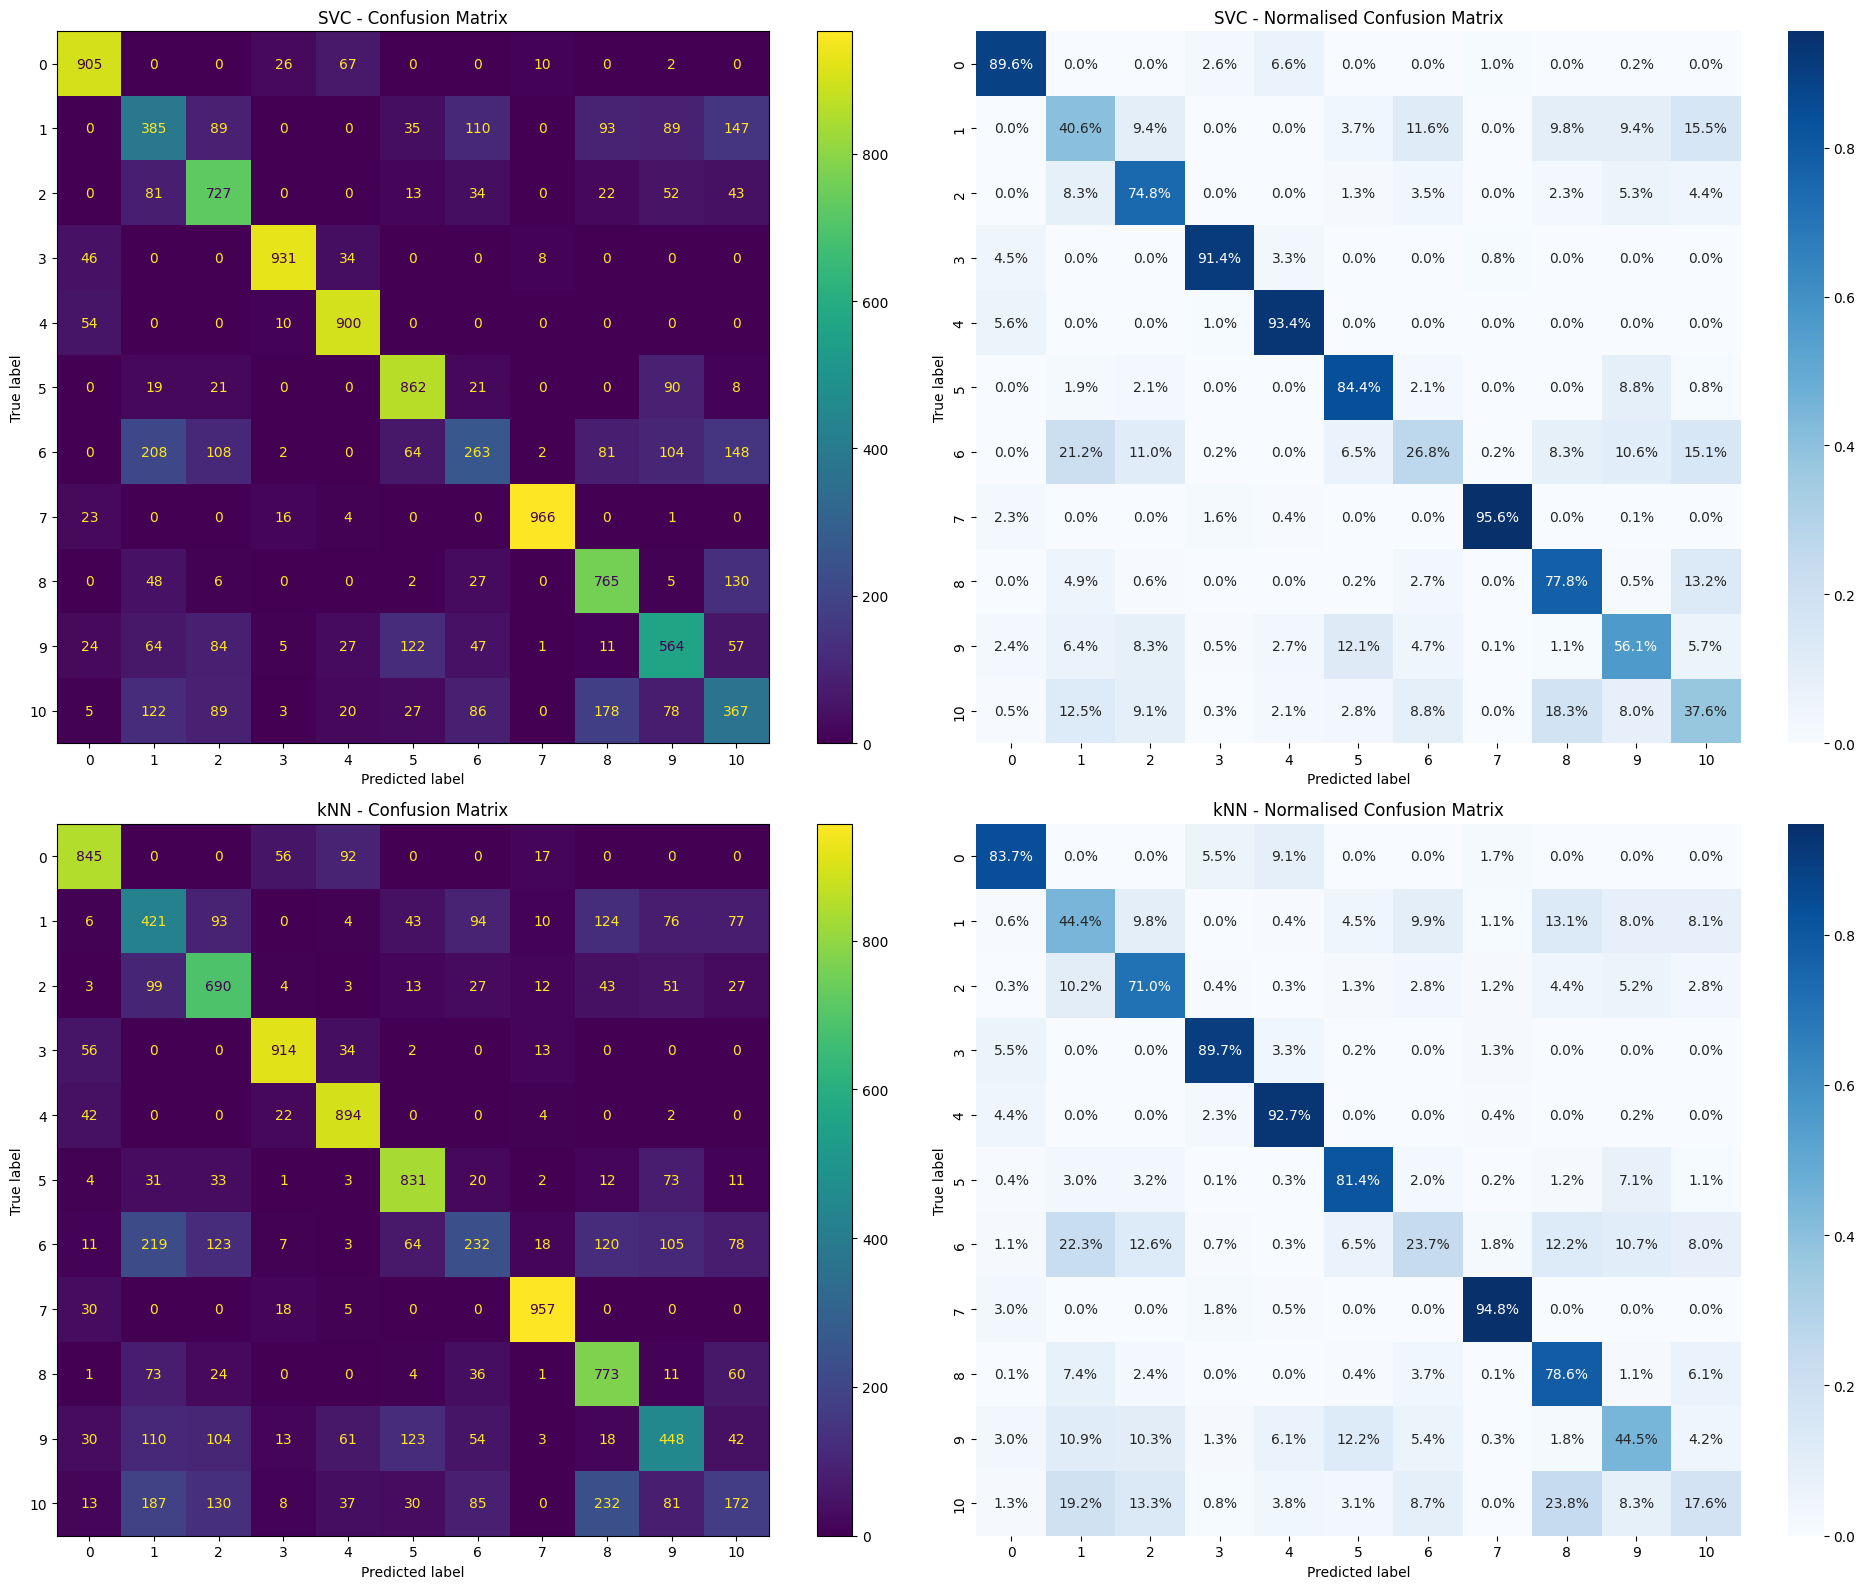

In [21]:
# Calcul des matrices de confusion normalisées pour les deux modèles
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc, normalize='true')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, normalize='true')

# Récupérer les étiquettes uniques triées
labels = np.sort(y_test.unique())

# Création de la figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Configuration des axes pour chaque sous-figure
axe_confusion_matrix_svc = axes[0, 0]
axe_confusion_matrix_normalised_svc = axes[0, 1]
axe_confusion_matrix_knn = axes[1, 0]
axe_confusion_matrix_normalised_knn = axes[1, 1]

# Affichage des matrices de confusion pour le modèle SVC
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, ax=axe_confusion_matrix_svc)
axe_confusion_matrix_svc.set_title("SVC - Confusion Matrix")

# Affichage de la matrice de confusion normalisée pour SVC
sns.heatmap(conf_matrix_svc, annot=True, fmt=".1%", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axe_confusion_matrix_normalised_svc)
axe_confusion_matrix_normalised_svc.set_xlabel("Predicted label")
axe_confusion_matrix_normalised_svc.set_ylabel("True label")
axe_confusion_matrix_normalised_svc.set_title("SVC - Normalised Confusion Matrix")

# Affichage des matrices de confusion pour le modèle kNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axe_confusion_matrix_knn)
axe_confusion_matrix_knn.set_title("kNN - Confusion Matrix")

# Affichage de la matrice de confusion normalisée pour kNN
sns.heatmap(conf_matrix_knn, annot=True, fmt=".1%", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axe_confusion_matrix_normalised_knn)
axe_confusion_matrix_normalised_knn.set_xlabel("Predicted label")
axe_confusion_matrix_normalised_knn.set_ylabel("True label")
axe_confusion_matrix_normalised_knn.set_title("kNN - Normalised Confusion Matrix")

# Ajustement de la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()


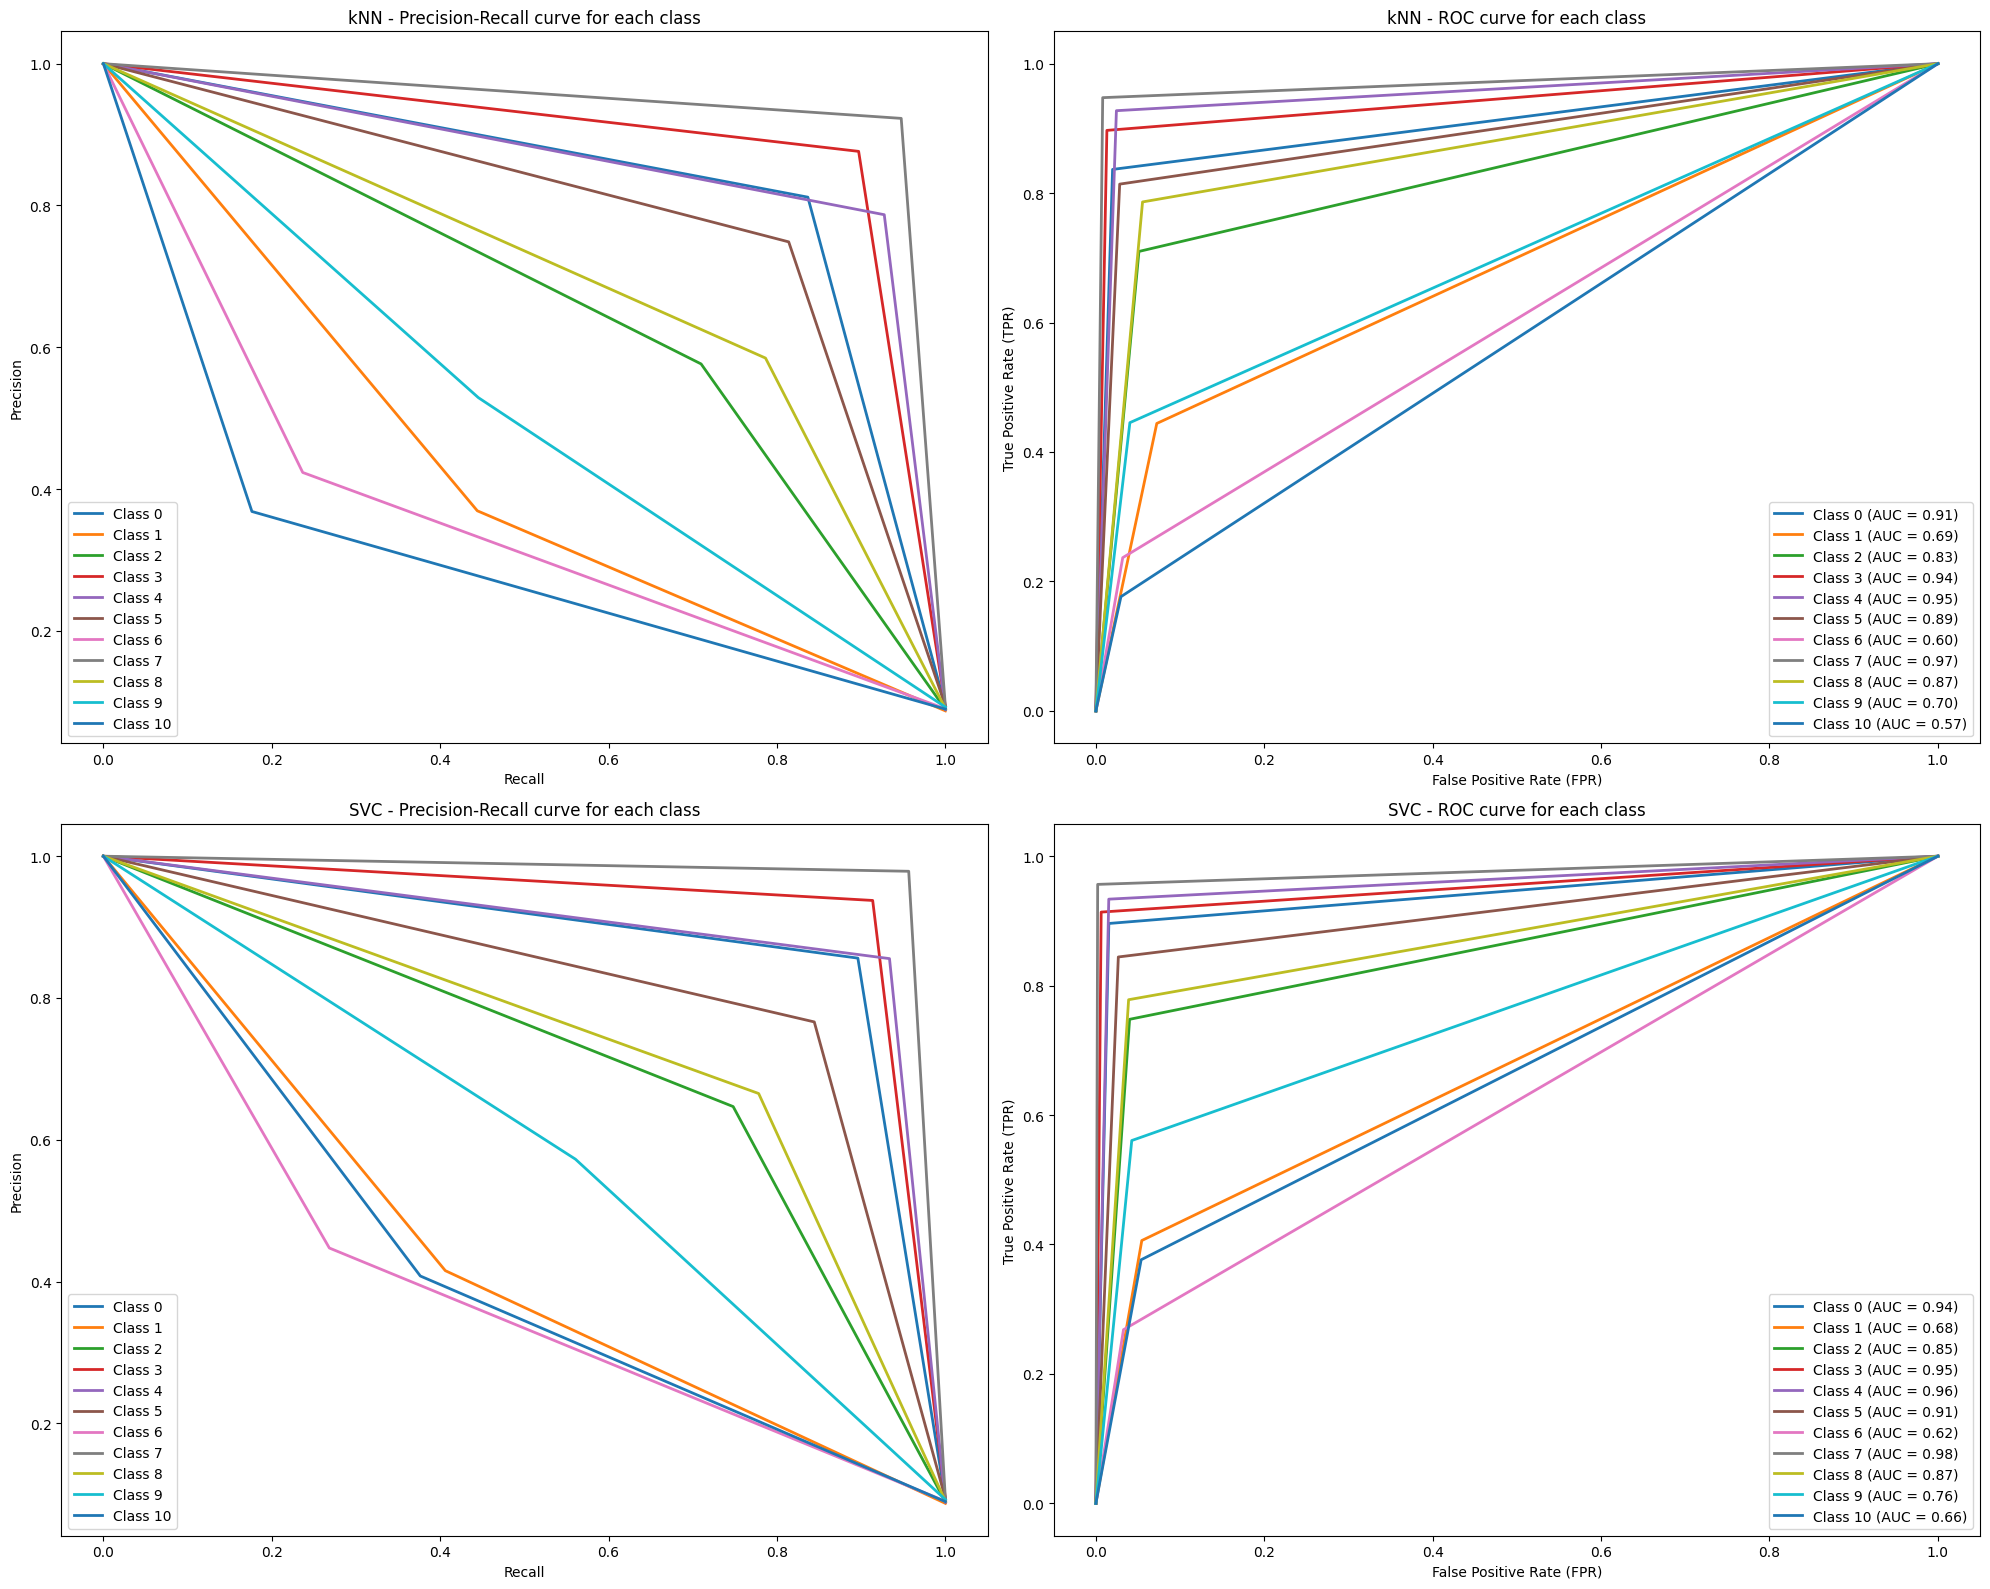

In [22]:
# Binarisation des classes pour les calculs des courbes ROC
y_test_bin_knn = label_binarize(y_test, classes=knn.classes_)
y_test_bin_svc = label_binarize(y_test, classes=svc.classes_)
n_classes_knn = y_test_bin_knn.shape[1]
n_classes_svc = y_test_bin_svc.shape[1]

# Création de la figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Courbes de précision-rappel pour le modèle kNN
for i in range(n_classes_knn):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_knn == i)
    axes[0, 0].plot(recall, precision, lw=2, label=f'Class {knn.classes_[i]}')

axes[0, 0].set_xlabel("Recall")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].set_title("kNN - Precision-Recall curve for each class")
axes[0, 0].legend()

# Courbes ROC pour le modèle kNN
for i in range(n_classes_knn):
    fpr, tpr, _ = roc_curve(y_test_bin_knn[:, i], y_pred_knn == i)
    axes[0, 1].plot(fpr, tpr, lw=2, label=f'Class {knn.classes_[i]} (AUC = {auc(fpr, tpr):.2f})')

axes[0, 1].set_xlabel("False Positive Rate (FPR)")
axes[0, 1].set_ylabel("True Positive Rate (TPR)")
axes[0, 1].set_title("kNN - ROC curve for each class")
axes[0, 1].legend()

# Courbes de précision-rappel pour le modèle SVC
for i in range(n_classes_svc):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_svc == i)
    axes[1, 0].plot(recall, precision, lw=2, label=f'Class {svc.classes_[i]}')

axes[1, 0].set_xlabel("Recall")
axes[1, 0].set_ylabel("Precision")
axes[1, 0].set_title("SVC - Precision-Recall curve for each class")
axes[1, 0].legend()

# Courbes ROC pour le modèle SVC
for i in range(n_classes_svc):
    fpr, tpr, _ = roc_curve(y_test_bin_svc[:, i], y_pred_svc == i)
    axes[1, 1].plot(fpr, tpr, lw=2, label=f'Class {svc.classes_[i]} (AUC = {auc(fpr, tpr):.2f})')

axes[1, 1].set_xlabel("False Positive Rate (FPR)")
axes[1, 1].set_ylabel("True Positive Rate (TPR)")
axes[1, 1].set_title("SVC - ROC curve for each class")
axes[1, 1].legend()

# Ajustement de la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()


Nous remarquons une amélioration au niveau de la répartion des données, ce qui nous permet de réaliser notre comparaison finale entre les 2 modèles

# 6. Comparaison des modèles

Affichons les différents scores de nos modèles

In [23]:
# Évaluation de la performance du SVC
svc_class_report = classification_report(y_test, y_pred_svc)
print(svc_class_report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1010
           1       0.42      0.41      0.41       948
           2       0.65      0.75      0.69       972
           3       0.94      0.91      0.93      1019
           4       0.86      0.93      0.89       964
           5       0.77      0.84      0.80      1021
           6       0.45      0.27      0.34       980
           7       0.98      0.96      0.97      1010
           8       0.67      0.78      0.72       983
           9       0.57      0.56      0.57      1006
          10       0.41      0.38      0.39       975

    accuracy                           0.70     10888
   macro avg       0.69      0.70      0.69     10888
weighted avg       0.69      0.70      0.69     10888



In [24]:
# Évaluation de la performance de KNN
knn_class_report = classification_report(y_test, y_pred_knn)
print(knn_class_report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1010
           1       0.37      0.44      0.40       948
           2       0.58      0.71      0.64       972
           3       0.88      0.90      0.89      1019
           4       0.79      0.93      0.85       964
           5       0.75      0.81      0.78      1021
           6       0.42      0.24      0.30       980
           7       0.92      0.95      0.94      1010
           8       0.58      0.79      0.67       983
           9       0.53      0.45      0.48      1006
          10       0.37      0.18      0.24       975

    accuracy                           0.66     10888
   macro avg       0.64      0.66      0.64     10888
weighted avg       0.64      0.66      0.64     10888



Dans les premiers résultats, nous avons pû remarquer que le modèle SVC possèdait de meilleures performance que le KNN.

La tendance semble se confirmer avec les données équilibrées.

En effet, le SVM possède des scores supérieur au KNN que ça soit sur la precision de chaque classe ou l'accuracy globale (0.70 pour le SVC contre 0.66 pour le KNN).

Cependant grâce au ré-équilibrage des données, les 2 modèles ont subit en gain en terme de précision

Essayons de rendre nos modèles plus performants en réduisant le nombre de dimensions

# 7. Réduction des dimensions

Nous allons réaliser une analyse des composantes principales afin de réduire le nombre de dimensions à fournir à nos modèles

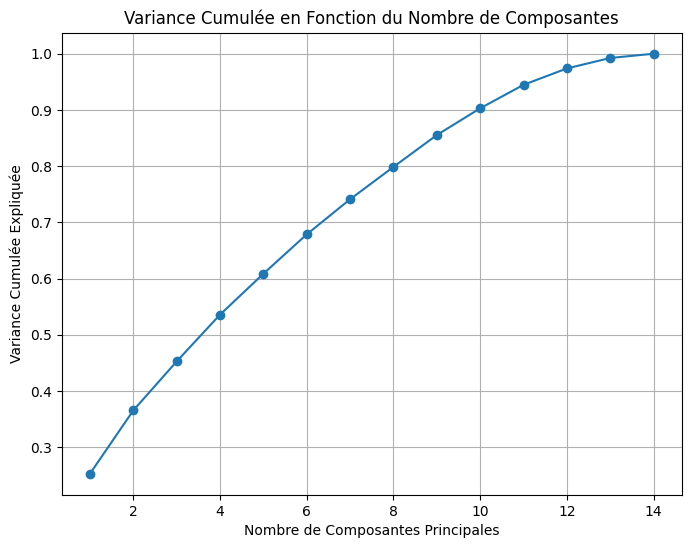

In [27]:
# Réaliser l'analyse des composante principale
pca = PCA()
X_pca = pca.fit_transform(X_resampled)

# Afficher le pourcentage de variance expliqué par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Visualiser le pourcentage de variance cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.title("Variance Cumulée en Fonction du Nombre de Composantes")
plt.grid(True)
plt.show()

Sur ce graphique, nous pouvons observer la variance cumulé.

La variance atteint les 85% à partir de 9 composant.

Nous allons donc réaliser des nouvelles prédiction en utilisant uniquement ces 9 composant

In [29]:
# Appliquer la PCA avec le nombre de composantes choisi
pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X_resampled)

# Diviser les données réduites en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42)

# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
y_pred = knn.predict(X_test)

# Affichage de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN avec PCA:", accuracy)


svc = SVC(C=1, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
y_pred = svc.predict(X_test)

# Affichage de la précision
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVC avec PCA:", accuracy)


Précision du modèle KNN avec PCA: 0.6041513592946363
Précision du modèle SVC avec PCA: 0.619581190301249


Nous pouvons observer une réduction de 9% (0.70 - 0.61) sur l'accuracy pour le modèle SVC et une réduction de 6% (0.66 - 0.60) pour le KNN.

Ce qui signifie qu'une réduction de dimensions à un impact négatif sur nos modèles et doit être donc limité si l'on veut obtenir une bonne précision avec de bonnes performances.

### Conclusion
Dans ce notebook, nous avons testé deux algorithmes de classification : Support Vector Classification (SVC) et K-Nearest Neighbors (KNN). 

Après avoir comparé les résultats obtenus, nous pouvons conclure que SVC a donné les meilleurs résultats pour cette tâche de classification de genre musical.

Il pourrait être intérésant de réaliser une nouvelle étude sur le même modèle avec des données plus importantes afin de donner une réponse plus précise entre ces 2 modèles

Si le SVC obtient encore de meilleur résultat alors il serait pertinant de le comparer avec un autre modèle afin de savoir si il s'agit du modèle le plus performant pour la classification de genre musical.